<a href="https://colab.research.google.com/github/SWAP1795/BDAL-Labs/blob/main/MovieReview_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries for preprocessing

In [ ]:
import numpy as np
import pandas as pd

movies_df = pd.read_csv('tmdb_5000_movies.csv')
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

Dropping unnecessary columns from the dataset

In [ ]:
movies_df = movies_df.drop(['homepage', 'keywords', 'original_title', 'overview', 'production_countries', 'spoken_languages', 'tagline', 'vote_average', 'vote_count'], axis = 1)
movies_df

,budget,genres,id,original_language,popularity,production_companies,release_date,revenue,runtime,status,title
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Released,Avatar
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Released,Spectre
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,Released,John Carter
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,es,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04,2040920,81.0,Released,El Mariachi
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,en,0.642552,[],2011-12-26,0,85.0,Released,Newlyweds
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,en,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered"
4801,0,[],126186,en,0.857008,[],2012-05-03,0,98.0,Released,Shanghai Calling


Looking for null values in the dataset

In [ ]:
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
original_language       0
popularity              0
production_companies    0
release_date            1
revenue                 0
runtime                 2
status                  0
title                   0
dtype: int64

Removing the null values from "release_date" column

In [ ]:
movies_df = movies_df.dropna(subset = ['release_date'])
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
original_language       0
popularity              0
production_companies    0
release_date            0
revenue                 0
runtime                 2
status                  0
title                   0
dtype: int64

Extracting Genre from "genres" column and updating in new column

In [ ]:
import ast
movies_df['genres'] = movies_df['genres'].apply(lambda x: ast.literal_eval(x))
movies_df = movies_df[movies_df['genres'].map(lambda d: len(d))>0]
movies_df

,budget,genres,id,original_language,popularity,production_companies,release_date,revenue,runtime,status,title
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Released,Avatar
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Released,Spectre
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,Released,John Carter
...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{'id': 10769, 'name': 'Foreign'}, {'id': 53, ...",67238,en,0.022173,[],2005-03-12,0,80.0,Released,Cavite
4798,220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",9367,es,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04,2040920,81.0,Released,El Mariachi
4799,9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",72766,en,0.642552,[],2011-12-26,0,85.0,Released,Newlyweds
4800,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",231617,en,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered"


In [ ]:
movies_df['genre_ids'] = movies_df['genres'].apply(lambda x: [genre['id'] for genre in x])

In [ ]:
genre_df = movies_df['genres'].explode().apply(pd.Series)

genre_df = genre_df.rename(columns={'id': 'genre_id', 'name': 'genre_name'})

genre_df = genre_df.reset_index(drop=True)

genre_df

,genre_id,genre_name
0,28,Action
1,12,Adventure
2,14,Fantasy
3,878,Science Fiction
4,12,Adventure
...,...,...
12155,35,Comedy
12156,18,Drama
12157,10749,Romance
12158,10770,TV Movie


Converting datatype to integer

In [ ]:
genre_df['genre_id'].astype(int)

genre_df

,genre_id,genre_name
0,28,Action
1,12,Adventure
2,14,Fantasy
3,878,Science Fiction
4,12,Adventure
...,...,...
12155,35,Comedy
12156,18,Drama
12157,10749,Romance
12158,10770,TV Movie


Dropping duplicates from the dataframe

In [ ]:
genre_df = genre_df.drop_duplicates(
  subset = ['genre_id', 'genre_name']).reset_index(drop = True)

genre_df

,genre_id,genre_name
0,28,Action
1,12,Adventure
2,14,Fantasy
3,878,Science Fiction
4,80,Crime
5,18,Drama
6,53,Thriller
7,16,Animation
8,10751,Family
9,37,Western


Extracting Production Companies name from the dataset

In [ ]:
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: ast.literal_eval(x))

movies_df = movies_df[movies_df['production_companies'].map(lambda d: len(d)) > 0]

movies_df

,budget,genres,id,original_language,popularity,production_companies,release_date,revenue,runtime,status,title,genre_ids
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,en,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",2009-12-10,2787965087,162.0,Released,Avatar,"[28, 12, 14, 878]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,en,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,"[12, 14, 28]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,en,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",2015-10-26,880674609,148.0,Released,Spectre,"[28, 12, 80]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,en,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,"[28, 80, 18, 53]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,en,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",2012-03-07,284139100,132.0,Released,John Carter,"[28, 12, 878]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{'id': 18, 'name': 'Drama'}]",124606,en,0.918116,"[{'name': 'Asylum Films', 'id': 10571}, {'name...",1995-09-09,0,98.0,Released,Bang,[18]
4796,7000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",14337,en,23.307949,"[{'name': 'Thinkfilm', 'id': 446}]",2004-10-08,424760,77.0,Released,Primer,"[878, 18, 53]"
4798,220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",9367,es,14.269792,"[{'name': 'Columbia Pictures', 'id': 5}]",1992-09-04,2040920,81.0,Released,El Mariachi,"[28, 80, 53]"
4800,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",231617,en,1.444476,"[{'name': 'Front Street Pictures', 'id': 3958}...",2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered","[35, 18, 10749, 10770]"


Coverting into list

In [ ]:
movies_df['prod_comp_ids'] = movies_df['production_companies'].apply(lambda x: [ph['id'] for ph in x])

movies_df

<ipython-input-13-e6cccdc425a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['prod_comp_ids'] = movies_df['production_companies'].apply(lambda x: [ph['id'] for ph in x])


,budget,genres,id,original_language,popularity,production_companies,release_date,revenue,runtime,status,title,genre_ids,production_companies_ids,prod_comp_ids
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,en,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",2009-12-10,2787965087,162.0,Released,Avatar,"[28, 12, 14, 878]","[289, 306, 444, 574]","[289, 306, 444, 574]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,en,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,"[12, 14, 28]","[2, 130, 19936]","[2, 130, 19936]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,en,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",2015-10-26,880674609,148.0,Released,Spectre,"[28, 12, 80]","[5, 10761, 69434]","[5, 10761, 69434]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,en,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,"[28, 80, 18, 53]","[923, 6194, 9993, 9996]","[923, 6194, 9993, 9996]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,en,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",2012-03-07,284139100,132.0,Released,John Carter,"[28, 12, 878]",[2],[2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{'id': 18, 'name': 'Drama'}]",124606,en,0.918116,"[{'name': 'Asylum Films', 'id': 10571}, {'name...",1995-09-09,0,98.0,Released,Bang,[18],"[10571, 26598, 40739]","[10571, 26598, 40739]"
4796,7000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",14337,en,23.307949,"[{'name': 'Thinkfilm', 'id': 446}]",2004-10-08,424760,77.0,Released,Primer,"[878, 18, 53]",[446],[446]
4798,220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",9367,es,14.269792,"[{'name': 'Columbia Pictures', 'id': 5}]",1992-09-04,2040920,81.0,Released,El Mariachi,"[28, 80, 53]",[5],[5]
4800,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",231617,en,1.444476,"[{'name': 'Front Street Pictures', 'id': 3958}...",2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered","[35, 18, 10749, 10770]","[3958, 6438]","[3958, 6438]"


In [ ]:
production_companies_df = movies_df['production_companies'].explode().apply(pd.Series)

production_companies_df = production_companies_df.rename(columns={'id': 'production_companies_id', 'name': 'production_companies_name'})

production_companies = production_companies_df.reset_index(drop=True)

production_companies_df

,production_companies_name,production_companies_id
0,Ingenious Film Partners,289
0,Twentieth Century Fox Film Corporation,306
0,Dune Entertainment,444
0,Lightstorm Entertainment,574
1,Walt Disney Pictures,2
...,...,...
4798,Columbia Pictures,5
4800,Front Street Pictures,3958
4800,Muse Entertainment Enterprises,6438
4802,rusty bear entertainment,87986


Removing Duplicates from the above dataframe

In [ ]:
production_companies_df = production_companies_df.drop_duplicates(
  subset = ['production_companies_id', 'production_companies_name']).reset_index(drop = True)

production_companies_df

,production_companies_name,production_companies_id
0,Ingenious Film Partners,289
1,Twentieth Century Fox Film Corporation,306
2,Dune Entertainment,444
3,Lightstorm Entertainment,574
4,Walt Disney Pictures,2
...,...,...
5039,FM Entertainment,26598
5040,Eagle Eye Films Inc.,40739
5041,Front Street Pictures,3958
5042,rusty bear entertainment,87986


Dropping the previous two columns

In [ ]:
movies_df = movies_df.drop(['genres','production_companies'], axis = 1)

movies_df

,budget,id,original_language,popularity,release_date,revenue,runtime,status,title,genre_ids,production_companies_ids,prod_comp_ids
0,237000000,19995,en,150.437577,2009-12-10,2787965087,162.0,Released,Avatar,"[28, 12, 14, 878]","[289, 306, 444, 574]","[289, 306, 444, 574]"
1,300000000,285,en,139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,"[12, 14, 28]","[2, 130, 19936]","[2, 130, 19936]"
2,245000000,206647,en,107.376788,2015-10-26,880674609,148.0,Released,Spectre,"[28, 12, 80]","[5, 10761, 69434]","[5, 10761, 69434]"
3,250000000,49026,en,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,"[28, 80, 18, 53]","[923, 6194, 9993, 9996]","[923, 6194, 9993, 9996]"
4,260000000,49529,en,43.926995,2012-03-07,284139100,132.0,Released,John Carter,"[28, 12, 878]",[2],[2]
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,124606,en,0.918116,1995-09-09,0,98.0,Released,Bang,[18],"[10571, 26598, 40739]","[10571, 26598, 40739]"
4796,7000,14337,en,23.307949,2004-10-08,424760,77.0,Released,Primer,"[878, 18, 53]",[446],[446]
4798,220000,9367,es,14.269792,1992-09-04,2040920,81.0,Released,El Mariachi,"[28, 80, 53]",[5],[5]
4800,0,231617,en,1.444476,2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered","[35, 18, 10749, 10770]","[3958, 6438]","[3958, 6438]"


In [ ]:
movies_df = movies_df.drop(['production_companies_ids'], axis = 1)

movies_df

,budget,id,original_language,popularity,release_date,revenue,runtime,status,title,genre_ids,prod_comp_ids
0,237000000,19995,en,150.437577,2009-12-10,2787965087,162.0,Released,Avatar,"[28, 12, 14, 878]","[289, 306, 444, 574]"
1,300000000,285,en,139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,"[12, 14, 28]","[2, 130, 19936]"
2,245000000,206647,en,107.376788,2015-10-26,880674609,148.0,Released,Spectre,"[28, 12, 80]","[5, 10761, 69434]"
3,250000000,49026,en,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,"[28, 80, 18, 53]","[923, 6194, 9993, 9996]"
4,260000000,49529,en,43.926995,2012-03-07,284139100,132.0,Released,John Carter,"[28, 12, 878]",[2]
...,...,...,...,...,...,...,...,...,...,...,...
4795,0,124606,en,0.918116,1995-09-09,0,98.0,Released,Bang,[18],"[10571, 26598, 40739]"
4796,7000,14337,en,23.307949,2004-10-08,424760,77.0,Released,Primer,"[878, 18, 53]",[446]
4798,220000,9367,es,14.269792,1992-09-04,2040920,81.0,Released,El Mariachi,"[28, 80, 53]",[5]
4800,0,231617,en,1.444476,2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered","[35, 18, 10749, 10770]","[3958, 6438]"


coverting release_date column's string datatype to datetime format 

In [ ]:
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"])

movies_df

,budget,id,original_language,popularity,release_date,revenue,runtime,status,title,genre_ids,prod_comp_ids
0,237000000,19995,en,150.437577,2009-12-10,2787965087,162.0,Released,Avatar,"[28, 12, 14, 878]","[289, 306, 444, 574]"
1,300000000,285,en,139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,"[12, 14, 28]","[2, 130, 19936]"
2,245000000,206647,en,107.376788,2015-10-26,880674609,148.0,Released,Spectre,"[28, 12, 80]","[5, 10761, 69434]"
3,250000000,49026,en,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,"[28, 80, 18, 53]","[923, 6194, 9993, 9996]"
4,260000000,49529,en,43.926995,2012-03-07,284139100,132.0,Released,John Carter,"[28, 12, 878]",[2]
...,...,...,...,...,...,...,...,...,...,...,...
4795,0,124606,en,0.918116,1995-09-09,0,98.0,Released,Bang,[18],"[10571, 26598, 40739]"
4796,7000,14337,en,23.307949,2004-10-08,424760,77.0,Released,Primer,"[878, 18, 53]",[446]
4798,220000,9367,es,14.269792,1992-09-04,2040920,81.0,Released,El Mariachi,"[28, 80, 53]",[5]
4800,0,231617,en,1.444476,2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered","[35, 18, 10749, 10770]","[3958, 6438]"


Saving the above refined dataset into .csv files

In [ ]:
movies_df.to_csv('movies_refines.csv')
genre_df.to_csv('genre.csv')
production_companies_df.to_csv('production_companies.csv')

Adding a column for output label

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the movie review dataset
reviews = pd.read_csv('movies_refines.csv')

# Define a box office revenue threshold for success
revenue_threshold = 100000000
popularity_threshold = 100
budget_threshold = 100000000
runtime_threshold = 200

# Add a new column to the dataset with binary values indicating success
reviews['success'] = (reviews['revenue'] >= revenue_threshold).astype(int)
reviews['success'] = (reviews['popularity'] >= popularity_threshold).astype(int)
reviews['success'] = (reviews['budget'] >= budget_threshold).astype(int)
reviews['success'] = (reviews['runtime'] >= runtime_threshold).astype(int)

# Save the modified dataset to a new CSV file
reviews.to_csv('movie_reviews_with_labels.csv', index=False)




Now Classifying the dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Separate the input features (movie reviews) from the output label (success)
X = reviews['revenue']
y = reviews['success']

# Convert the revenue column to string datatype
reviews['revenue'] = reviews['revenue'].astype(str)
reviews['popularity'] = reviews['popularity'].astype(str)
reviews['budget'] = reviews['budget'].astype(str)
reviews['runtime'] = reviews['runtime'].astype(str)

# Convert the text reviews and revenue into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_vectors = vectorizer.fit_transform(reviews['revenue'] + ' ' + reviews['revenue'])
X_vectors = vectorizer.fit_transform(reviews['popularity'] + ' ' + reviews['popularity'])
#X_vectors = vectorizer.fit_transform(reviews['budget'] + ' ' + reviews['budget'])
X_vectors = vectorizer.fit_transform(reviews['runtime'] + ' ' + reviews['runtime'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.98      1.00      0.99       872
           1       0.00      0.00      0.00        18

    accuracy                           0.98       890
   macro avg       0.49      0.50      0.49       890
weighted avg       0.96      0.98      0.97       890



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC Curve

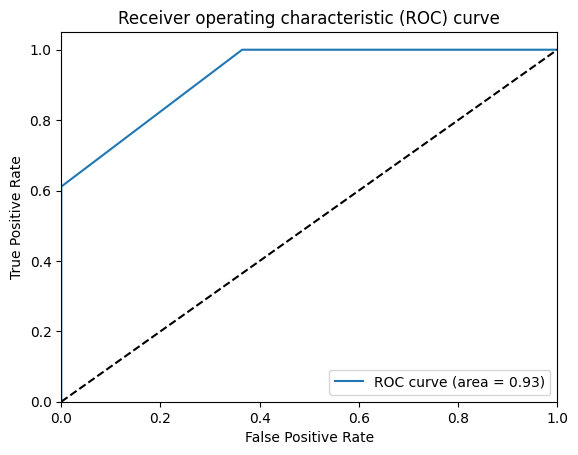

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Make predictions on the testing data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
